In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
"""
LOAD THE DATASET
"""

# Define the file path
file_path = "online_retail_II.xlsx"  # Ensure the file is in the same directory or provide the full path

# Load all sheets into a dictionary
df_sheets = pd.read_excel(file_path, sheet_name=None)

# Display available sheet names
print("Sheets available:", df_sheets.keys())


Sheets available: dict_keys(['Year 2009-2010', 'Year 2010-2011'])


In [92]:
"""
LOAD SPECIFIC SHEETS FROM EXCEL
"""

# Load the individual sheets
df_2009_2010 = df_sheets['Year 2009-2010']
df_2010_2011 = df_sheets['Year 2010-2011']

# Display first few rows of 2010-2011 dataset
df_2010_2011.head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [93]:
"""
DATA CLEANING

We'll clean the 2010-2011 dataset by:

Checking for missing values.
Dropping rows with missing Customer ID.
Converting InvoiceDate to a datetime format."""


# Check for missing values
print("Missing values per column (2010-2011):")
print(df_2010_2011.isnull().sum())

# Drop rows with missing Customer IDs
df_2010_2011 = df_2010_2011.dropna(subset=['Customer ID'])

# Convert InvoiceDate to datetime format
df_2010_2011['InvoiceDate'] = pd.to_datetime(df_2010_2011['InvoiceDate'])

# Confirm changes
print("Updated dataset info:")
print(df_2010_2011.info())


Missing values per column (2010-2011):
Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64
Updated dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_8170/4247731404.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010_2011['InvoiceDate'] = pd.to_datetime(df_2010_2011['InvoiceDate'])


In [94]:
"""
FEATURE ENGINEERING


We'll add:

Total Sales column (Quantity × Price).
YearMonth column (for monthly sales analysis).
"""

# Create a new column for Total Sales
df_2010_2011['TotalSales'] = df_2010_2011['Quantity'] * df_2010_2011['Price']

# Extract Year-Month for trend analysis
df_2010_2011['YearMonth'] = df_2010_2011['InvoiceDate'].dt.to_period('M')

# Display updated dataset
df_2010_2011.head()


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_8170/1379724142.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010_2011['TotalSales'] = df_2010_2011['Quantity'] * df_2010_2011['Price']
/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_8170/1379724142.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010_2011['YearMonth'] = df_2010_2011['InvoiceDate'].dt.to_period('M')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


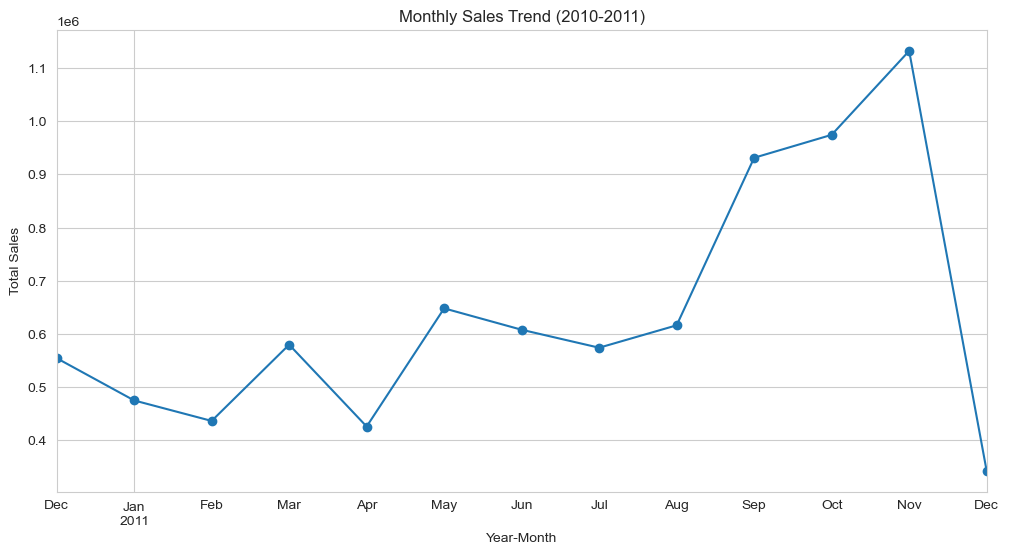

In [95]:
"""
SALES TREND ANALYSIS
We'll analyze monthly sales trends.
"""


# Aggregate total sales per month
monthly_sales = df_2010_2011.groupby('YearMonth')['TotalSales'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Sales Trend (2010-2011)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [96]:
"""
CUSTOMER SEGMENTATION
Identify top customers based on total spending.
"""

# Aggregate total sales per customer
customer_sales = df_2010_2011.groupby('Customer ID')['TotalSales'].sum().sort_values(ascending=False)

# Display the top 10 customers
print("Top 10 Customers by Total Spending (2010-2011):")
print(customer_sales.head(10))


Top 10 Customers by Total Spending (2010-2011):
Customer ID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: TotalSales, dtype: float64


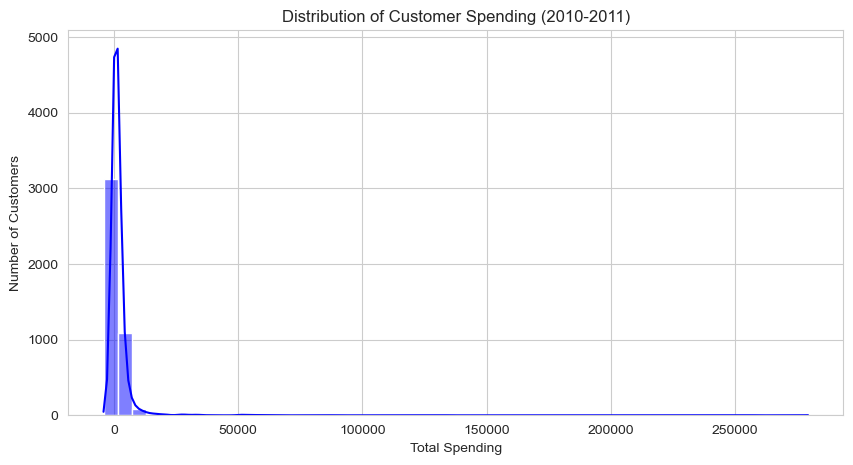

In [97]:
"""
Histogram: Distribution of Total Spending per Customer

This helps us see if most customers are low or high spenders.
"""

# Plot histogram of total spending per customer
plt.figure(figsize=(10, 5))
sns.histplot(customer_sales, bins=50, kde=True, color='blue')
plt.title("Distribution of Customer Spending (2010-2011)")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_8170/1982206203.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_customers.index.astype(str), y=top_10_customers.values, palette='viridis')


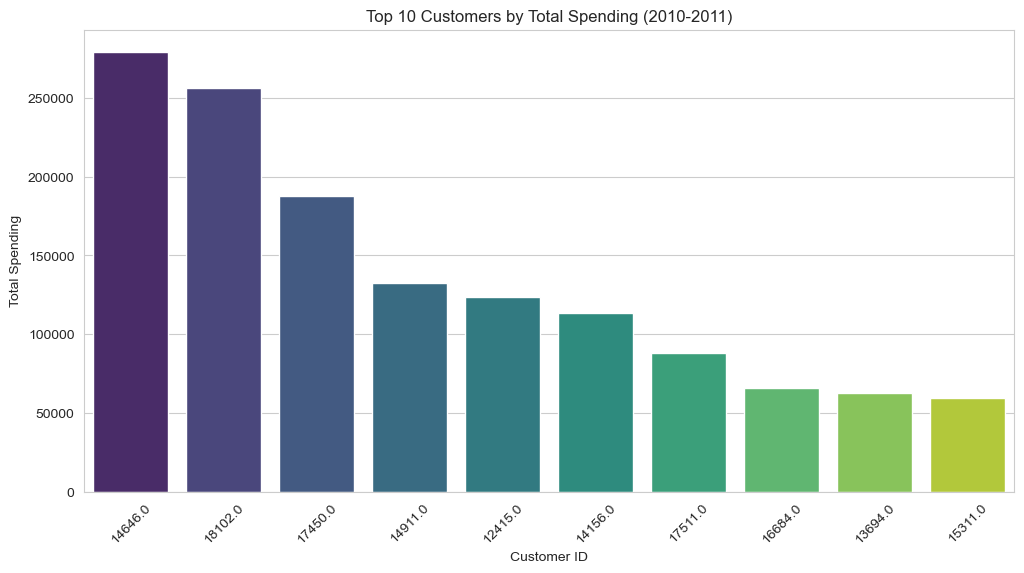

In [98]:
"""
Top 10 Customers: Bar Chart
This highlights the highest-spending customers.

"""


# Get the top 10 customers
top_10_customers = customer_sales.head(10)

# Plot top 10 customers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_customers.index.astype(str), y=top_10_customers.values, palette='viridis')
plt.title("Top 10 Customers by Total Spending (2010-2011)")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()


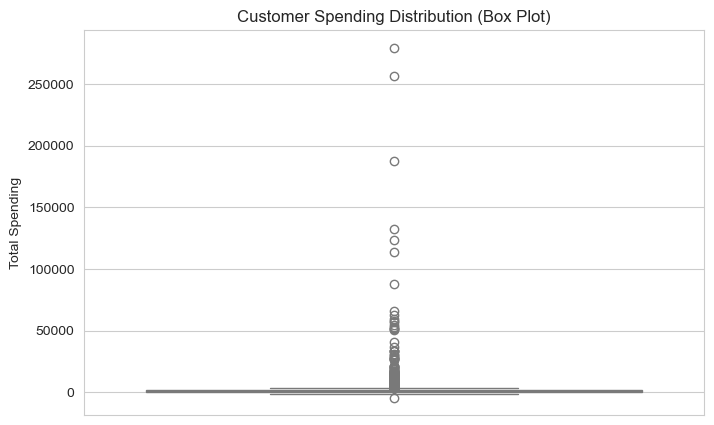

In [99]:
"""
Box Plot: Identifying High-Value Customers
A box plot helps us see the spread of spending and detect outliers (VIP customers).

"""


# Plot a box plot to detect spending outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=customer_sales, color='lightblue')
plt.title("Customer Spending Distribution (Box Plot)")
plt.ylabel("Total Spending")
plt.show()


In [100]:
"""
Product Performance Analysis
We'll identify best-selling and least-selling products based on total revenue.

"""


# Aggregate total sales per product
product_performance = df_2010_2011.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)

# Display the top 10 best-selling products
print("Top 10 Best-Selling Products (2010-2011):")
print(product_performance.head(10))


Top 10 Best-Selling Products (2010-2011):
Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66728.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalSales, dtype: float64


In [101]:
# Display the bottom 10 least-selling products
print("Bottom 10 Least-Selling Products (2010-2011):")
print(product_performance.tail(10))

Bottom 10 Least-Selling Products (2010-2011):
Description
BLUE PADDED SOFT MOBILE              -25.50
PINK CHERRY LIGHTS                   -27.00
ASSORTED TUTTI FRUTTI ROUND BOX      -39.60
WOODEN BOX ADVENT CALENDAR           -45.70
CREAM SWEETHEART MAGAZINE RACK       -46.85
WHITE CHERRY LIGHTS                  -54.00
CHALKBOARD KITCHEN ORGANISER         -87.80
Discount                           -5696.22
CRUK Commission                    -7933.43
Manual                            -58385.46
Name: TotalSales, dtype: float64


Top 10 Countries by Total Sales (2010-2011):
Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196730.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalSales, dtype: float64


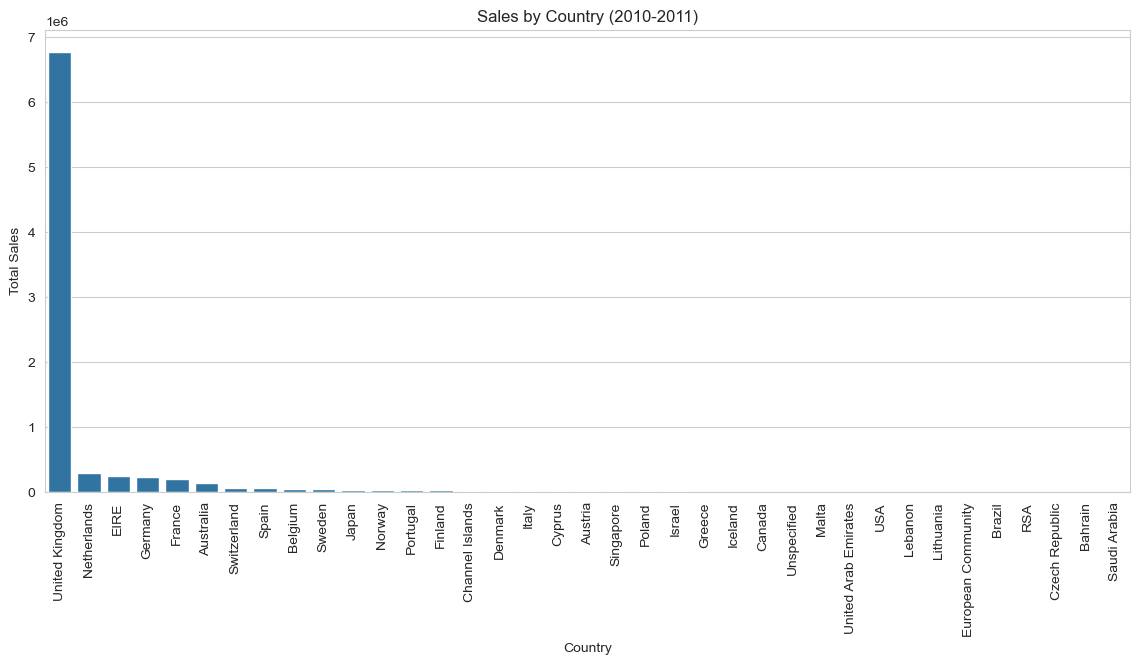

In [102]:
"""
Geographic Insights
Analyze sales distribution across different countries.

"""

import seaborn as sns

# Aggregate total sales by country
country_sales = df_2010_2011.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Display top 10 countries by sales
print("Top 10 Countries by Total Sales (2010-2011):")
print(country_sales.head(10))

# Plot sales by country
plt.figure(figsize=(14, 6))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.xticks(rotation=90)
plt.title('Sales by Country (2010-2011)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


In [103]:
"""
Save the Cleaned Data to CSV

"""


# Save the cleaned dataset to a CSV file
df_2010_2011.to_csv("cleaned_online_retail_2010_2011.csv", index=False)

print("Cleaned dataset saved successfully as 'cleaned_online_retail_2010_2011.csv'!")



Cleaned dataset saved successfully as 'cleaned_online_retail_2010_2011.csv'!


In [104]:
# Load the cleaned dataset
df_cleaned = pd.read_csv("cleaned_online_retail_2010_2011.csv")

# Display first few rows
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
